In [3]:
import pandas as pd
import sklearn as sk
import time
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
#%pylab inline
#%%

t1 = time.time()
print('Loading database ...')
df = pd.read_hdf('database/all_data_comp.h5','table')
print('Time to load database:', time.time()-t1)
#%%

# Variable names.
import var_names
d = var_names.d

# Check number of combinations, just to be sure.

features =  ['rpm',
             'frp',
             'exh_T',
             'TC_rpm']


# The combinations are done manually in an Excel workbook, it was too tedious to make. This way it is easier but
# might not be the best way... it works...


feat = pd.read_excel('training_setup.xlsx',index_col='test_no')

# Create a list of features for each test. A list which will contain a list of features for each row. This list
# will be used for the training.

test_features = list()


for i in range(30):
    
    tmp_l = list()
    
    if feat.iloc[i][0] == 1:
        #print('ett')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 2:
        #print('två')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 3:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 4:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(13,17):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
    
    test_features.append(tmp_l)

# And then at last add the corresponding predictor to each test set.


for i in range(len(test_features)):
    if 'AE1' in test_features[i][0]:
        test_features[i].append(d['fo_booster_13'])
    if 'AE2' in test_features[i][0]:
        test_features[i].append(d['fo_booster_24'])


Loading database ...
Time to load database: 2.8200042247772217
Test: 1 ae1_rpm
Test: 1 ae3_rpm
Test: 1 me1_rpm
Test: 1 me3_rpm
Test: 2 ae1_frp
Test: 2 ae3_frp
Test: 2 me1_frp
Test: 2 me3_frp
Test: 3 ae1_exh_T
Test: 3 ae3_exh_T
Test: 3 me1_exh_T
Test: 3 me3_exh_T
Test: 4 ae1_TC_rpm
Test: 4 ae3_TC_rpm
Test: 4 me1_TC_rpm
Test: 4 me3_TC_rpm
Test: 5 ae1_rpm
Test: 5 ae3_rpm
Test: 5 me1_rpm
Test: 5 me3_rpm
Test: 5 ae1_frp
Test: 5 ae3_frp
Test: 5 me1_frp
Test: 5 me3_frp
Test: 6 ae1_rpm
Test: 6 ae3_rpm
Test: 6 me1_rpm
Test: 6 me3_rpm
Test: 6 ae1_exh_T
Test: 6 ae3_exh_T
Test: 6 me1_exh_T
Test: 6 me3_exh_T
Test: 7 ae1_rpm
Test: 7 ae3_rpm
Test: 7 me1_rpm
Test: 7 me3_rpm
Test: 7 ae1_TC_rpm
Test: 7 ae3_TC_rpm
Test: 7 me1_TC_rpm
Test: 7 me3_TC_rpm
Test: 8 ae1_frp
Test: 8 ae3_frp
Test: 8 me1_frp
Test: 8 me3_frp
Test: 8 ae1_exh_T
Test: 8 ae3_exh_T
Test: 8 me1_exh_T
Test: 8 me3_exh_T
Test: 9 ae1_frp
Test: 9 ae3_frp
Test: 9 me1_frp
Test: 9 me3_frp
Test: 9 ae1_TC_rpm
Test: 9 ae3_TC_rpm
Test: 9 me1_TC_rpm


In [20]:
df_train = pd.DataFrame()
for i in range(len(test_features)):
    df_train = df_train.append(df[test_features[i]]).resample('15min').mean()
    

df_train = df_train.dropna()

# Filter out below zero
    

for n in list(df_train):
    df_train[n][(df_train[n] < 0)] = 0
    

date_begin = '2014-02-01'
date_end = '2014-12-16'

df_train = df_train[date_begin:date_end]

print(df_train.describe())

       AE1 ENG SPEED:1745:RPM:Average:900  \
count                        30624.000000   
mean                           394.698595   
std                            367.883957   
min                              0.000000   
25%                              0.000000   
50%                            737.733333   
75%                            750.466667   
max                            760.000000   

       AE1 EXH MEAN VALUE:1591:  C:Average:900  \
count                             30624.000000   
mean                                222.944978   
std                                 146.610908   
min                                   0.000000   
25%                                  75.466667   
50%                                 320.400000   
75%                                 359.533333   
max                                 431.066667   

       AE1 FUEL RACK POSIT:1742:mm:Average:900  \
count                             30624.000000   
mean                                 10.828

In [21]:
df_train2 = df_train.resample('1D').mean()

In [24]:
df_train2.describe()

,AE1 ENG SPEED:1745:RPM:Average:900,AE1 EXH MEAN VALUE:1591: C:Average:900,AE1 FUEL RACK POSIT:1742:mm:Average:900,AE1 TC SPEED:1748:RPM:Average:900,AE2 ENG SPEED:2745:RPM:Average:900,AE2 EXH MEAN VALUE:2591: C:Average:900,AE2 FUEL RACK POSIT:2742:mm:Average:900,AE2 TC SPEED:2748:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,AE3 EXH MEAN VALUE:3591: C:Average:900,...,ME2 FUEL RACK POSIT:20005:%:Average:900,ME2 T/C SPEED:20006:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900,ME3 EXH GAS MEAN:3125:C:Average:900,ME3 FUEL RACK POSIT:30005:%:Average:900,ME3 T/C SPEED:30006:rpm:Average:900,ME4 ENGINE SPEED:4364:rpm:Average:900,ME4 EXH GAS MEAN:4125:C:Average:900,ME4 FUEL RACK POSIT:40005:%:Average:900,ME4 T/C SPEED:40006:rpm:Average:900
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,394.698595,222.944978,10.828951,8349.694446,324.487335,203.659239,12.654099,6759.406479,169.412385,146.880291,...,12.165520,4484.403686,136.519933,187.907736,12.547920,4757.749316,124.419687,180.895840,11.743487,4594.686134
std,186.949109,83.366598,6.329723,4393.665845,196.731226,77.066505,5.820554,4464.424222,119.594829,50.880089,...,10.774076,3900.602592,110.332921,93.744815,10.606434,3869.683269,108.312952,91.702636,10.608666,3962.013011
min,0.000000,0.000000,0.000000,0.000000,0.000000,39.643056,3.179861,0.000000,0.000000,50.547222,...,0.000000,36.630035,0.007275,63.063469,0.000000,7.554945,0.000000,59.177540,0.000000,73.260071
25%,307.967014,192.198264,7.277778,6022.297569,180.265625,145.812153,8.239931,3297.181597,95.426042,114.724306,...,0.987138,447.975174,17.516094,86.191527,1.375825,579.828046,0.848104,80.304308,0.010268,98.341474
50%,399.388194,227.420139,9.692361,7980.816667,314.492361,201.586111,11.675694,6410.089583,110.523611,122.338889,...,14.604062,5210.419255,189.510699,230.385261,17.294551,6730.423308,154.543215,199.955289,16.324695,6231.695200
75%,515.629861,279.398264,14.313194,11278.431250,468.789583,257.567708,16.984028,9996.734375,240.035764,181.233681,...,21.501033,8182.486305,236.529053,272.310176,20.857643,8118.198039,227.187453,268.085138,20.155241,8149.824519
max,750.439583,362.325694,46.519444,17638.572917,750.524306,398.858333,31.677083,19521.896528,716.746528,373.547917,...,37.236383,12506.288222,356.714298,355.612406,42.994465,13951.205809,352.476202,376.284501,43.525535,14033.541983


In [30]:
from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model

df_out = pd.DataFrame()

cores = -1
seed = 42
test_no = 15

df_test = df_train2[test_features[test_no]]

print(test_features[test_no])

# drop the last column, which is the measured
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
# y is the measured value
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

# make a test and train split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)

# 

print('Test number, linear model: ', test_no, '\n')
m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(X_train, y_train.reshape(-1,))

df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)

score = m_linear.score(X_test,y_test)
score_perc = m_linear.score(X_test,y_test)/max(y_test)
print('Score: ',score )
print('Score in % of max: ',score_perc )


['AE2 ENG SPEED:2745:RPM:Average:900', 'AE4 ENG SPEED:4745:RPM:Average:900', 'ME2 ENGINE SPEED:2364:rpm:Average:900', 'ME4 ENGINE SPEED:4364:rpm:Average:900', 'FO BOOST 2 CONSUMPT:6166:m3/h:Average:900']
Test number, linear model:  15 

Score:  0.8866648370085833
Score in % of max:  0.8781322349012111


In [33]:
df_test[d['ae2_rpm']]

Time
2014-02-01    399.412500
2014-02-02    448.454861
2014-02-03    369.751389
2014-02-04    407.712500
2014-02-05    504.479167
2014-02-06     50.747222
2014-02-07    382.446528
2014-02-08    643.024306
2014-02-09    381.700000
2014-02-10     47.573611
2014-02-11    153.541667
2014-02-12    181.370833
2014-02-13     61.454861
2014-02-14    205.704167
2014-02-15    295.197917
2014-02-16    225.431250
2014-02-17     60.399306
2014-02-18    259.981944
2014-02-19     74.584028
2014-02-20    214.904167
2014-02-21    427.483333
2014-02-22    446.856944
2014-02-23    210.367361
2014-02-24    247.383333
2014-02-25     94.338194
2014-02-26    314.492361
2014-02-27    180.590972
2014-02-28    308.412500
2014-03-01    359.709722
2014-03-02    182.836806
                 ...    
2014-11-17    244.468056
2014-11-18    247.915972
2014-11-19    718.729167
2014-11-20    124.776389
2014-11-21     75.636806
2014-11-22    252.962500
2014-11-23     50.257639
2014-11-24    161.043750
2014-11-25    327.79

In [78]:
df_test[d['ae2_rpm']].max()

750.5243055555553

In [41]:
X[0]

array([399.4125    ,  37.89305556,   2.54078492, 251.4330993 ])

In [79]:
    
m_ = m_linear.predict(np.array([750,750,750,750]).reshape(1,-1))

print()

IndentationError: expected an indented block (<ipython-input-79-996d3cca0ede>, line 3)

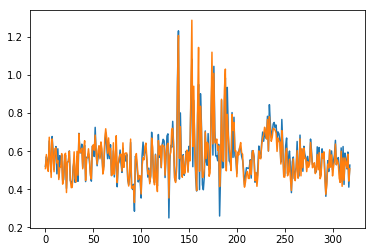

In [26]:
import matplotlib.pyplot as plt

plt.plot(m_linear.predict(X))
plt.plot(y)
plt.show()


In [28]:
df_test = df_train[test_features[test_no]]
# drop the last column, which is the measured
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
# y is the measured value
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

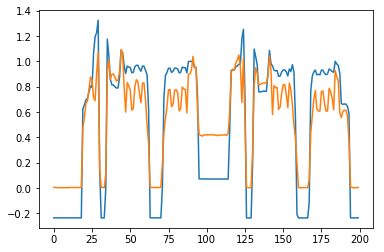

In [29]:


plt.plot(m_linear.predict(X)[0:200])
plt.plot(y[0:200])
plt.show()

In [7]:

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Train a linear model just for comparison.

gen = 10
cores = -1

results = list()
cols = ['test_no','model','CV-score','CV_perc']

df_out = pd.DataFrame()

df_out['y_13'] = df_train[d['fo_booster_13']]
df_out['y_24'] = df_train[d['fo_booster_24']]


seed = 42 # This is to get reproduce.


for test_no in range(len(test_features)):
    
    # Feature selection for the test run
    print('Test run', test_no, '\n')
    
    df_test = df_train[test_features[test_no]]
    # drop the last column, which is the measured
    X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
    # y is the measured value
    y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])
    
    # make a test and train split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)
    
    # 
    
    print('Test number, linear model: ', test_no, '\n')
    m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
    m_linear.fit(X_train, y_train.reshape(-1,))
    
    df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)

    score = m_linear.score(X_test,y_test)
    score_perc = m_linear.score(X_test,y_test)/max(y_test)
    print('Score: ',score )
    print('Score in % of max: ',score_perc )
    
    results.append([test_no,'linear',score,score_perc])

,AE1 ENG SPEED:1745:RPM:Average:900,AE1 EXH MEAN VALUE:1591: C:Average:900,AE1 FUEL RACK POSIT:1742:mm:Average:900,AE1 TC SPEED:1748:RPM:Average:900,AE2 ENG SPEED:2745:RPM:Average:900,AE2 EXH MEAN VALUE:2591: C:Average:900,AE2 FUEL RACK POSIT:2742:mm:Average:900,AE2 TC SPEED:2748:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,AE3 EXH MEAN VALUE:3591: C:Average:900,...,ME2 FUEL RACK POSIT:20005:%:Average:900,ME2 T/C SPEED:20006:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900,ME3 EXH GAS MEAN:3125:C:Average:900,ME3 FUEL RACK POSIT:30005:%:Average:900,ME3 T/C SPEED:30006:rpm:Average:900,ME4 ENGINE SPEED:4364:rpm:Average:900,ME4 EXH GAS MEAN:4125:C:Average:900,ME4 FUEL RACK POSIT:40005:%:Average:900,ME4 T/C SPEED:40006:rpm:Average:900
Time,,,,,,,,,,,,,,,,,,,,,
2014-02-01,642.322222,331.825694,18.741667,15031.242361,399.412500,229.721528,12.951389,7809.988889,126.810417,130.720833,...,0.000000,46.092795,253.288699,302.428415,24.248697,8308.363901,251.433099,287.542561,24.946680,9315.425381
2014-02-02,474.695139,260.498611,12.636111,10305.982639,448.454861,254.515972,15.966667,9853.865972,114.620139,123.305556,...,24.263531,8808.892999,0.434634,72.809611,0.000000,29.334554,0.000000,77.717019,0.000000,80.606432
2014-02-03,487.011111,268.643750,15.278472,11795.482639,369.751389,214.102778,11.576389,6765.273611,121.029861,123.304167,...,0.670737,296.530322,246.564382,299.070051,21.269801,7794.210460,226.745489,270.776551,19.840753,8090.420277
2014-02-04,586.199306,300.034028,15.404861,12511.573611,407.712500,231.270833,12.530556,7610.475000,119.561111,124.519444,...,19.983735,7763.583687,11.241402,83.869297,0.852431,347.054336,0.000000,77.197203,0.000000,80.606432
2014-02-05,364.860417,211.575000,7.812500,6872.304167,504.479167,279.357639,18.561806,11765.920139,98.083333,111.799306,...,0.069482,76.714488,255.880300,302.365168,23.159663,8394.317320,253.045754,287.219122,23.475786,9405.972769
2014-02-06,487.470139,263.142361,12.130556,10142.315972,50.747222,101.446528,4.859028,797.495833,105.382639,122.972222,...,22.773838,8494.439415,1.433862,79.130896,0.016491,41.992268,0.725970,83.599905,0.014592,92.409444
2014-02-07,614.875694,317.214583,17.211806,13902.131250,382.446528,223.873611,12.561806,7422.745833,109.391667,122.977778,...,0.293858,166.956654,225.965065,279.902476,18.031338,6921.784736,224.138125,269.343045,18.164807,7703.586734
2014-02-08,415.923611,234.433333,10.197222,8375.615278,643.024306,332.442361,21.604167,14647.069444,119.738889,123.947222,...,0.000000,37.047211,274.890442,322.743900,24.071446,8943.136997,272.979176,308.271270,24.701715,9964.621530
2014-02-09,464.288194,254.193750,11.858333,9820.613194,381.700000,224.017361,13.386111,8025.400000,107.571528,119.043750,...,21.635471,8448.448349,4.555445,75.851338,0.180463,115.811967,4.195767,79.768887,0.159966,172.903950


In [2]:
df

,AE LO SEPAR1 ALARM:7103:-:Average:900,AE LO SEPAR1 RUN:71034:nan:Average:900,AE LO SEPAR1 RUN:71034:nan:Raw data:3600,AE LO SEPAR2 RUN:71044:nan:Average:900,AE LO SEPAR2 RUN:71044:nan:Raw data:3600,AE LO SEPAR2 ALARM:7104:-:Average:900,AE SCR 2CFC20 ALARM:6854:-:Average:900,AE SCR 2CFC20 ALARM:6854:-:Raw data:3600,AE SCR CBD10 230V IS:6858:-:Average:900,AE SCR CBD10 230V IS:6858:-:Raw data:3600,...,UREA TANK T42S:6801:m3:Raw data:3600,UREA TOTAL VOLUME:6899:m3:Average:900,UREA TOTAL VOLUME:6899:m3:Raw data:3600,WORKING AIR COMPR:7207:nan:Average:900,WORKING AIR COMPR:7207:nan:Raw data:3600,WORKING AIR VESSEL P:7211:bar:Average:900,WORKING AIR VESSEL P:7211:bar:Raw data:3600,counter_engine_2_4,water_T_forsmark_smhi-opendata,water_T_landsort_smhi-opendata
Time,,,,,,,,,,,,,,,,,,,,,
2013-09-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.16,16.5
2013-09-20 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-20 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-20 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-20 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.21,16.4
2013-09-20 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-20 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-20 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-20 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.18,16.4
